<a href="https://colab.research.google.com/github/acedesci/scanalytics/blob/master/S04_Data_Structures_2/S4_Lecture_Notebook2_Inventory_Sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S4 - In-class Exercises: Python Data Structures II and SCM examples (Solution)

---
## Instructions:
Most of the exercises presented here allows you to practice basic Python programming for some applications in Operations Management and Logistics.

For each exercise, you have a code cell for the response underneath it, where you should write your answer between the lines containing `### start your code here ###` and `### end your code here ###`. Your code can contain one or more lines and you can execute this cell in order to complete the exercise. To execute the cell, you can type `Shift+Enter` or press the play button in the toolbar above. Your results will appear right below this response cell.

NOTE: Please pay attention to the variable name of the output you would need to provide under each question. You must use the same variable name for the output so that the result can be printed out correctly.

---
## Inventory simulation using pandas
In this exercise, you will use pandas library to simulate different inventory policies for a planning horizon of one year.

### Exercise 1: Reading data
Import the pandas library under the alias `pd`. Import the csv file `DemandSimulation.csv` into a `DataFrame`, and select the first column named `'Week'` as the index of the `DataFrame`.

**$\color{blue}{\textbf{Hint:}}$** you can define the index column of the `DataFrame` using the `index_col` parameter of the `.read_csv()` function. Check [this page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) for more information.

In [ ]:
### start your code here ###

import pandas as pd
df_inv = pd.read_csv('DemandSimulation.csv', index_col='Week')

### end your code here ###

Now display the first 10 rows of your `DataFrame`.

In [ ]:
### start your code here ###

df_inv.head(10)

###  end  your code here ###

,Dem_Scen
Week,
1,18
2,16
3,13
4,17
5,11
6,20
7,15
8,20
9,15


---
### Exercise 2: Indexing, selecting and assigning
Display the rows (weeks) of your `DataFrame` where the demand scenario is greater than 18 units.

**$\color{blue}{\textbf{Hint:}}$** *you can use the `.loc[]` method with boolean masks to select the data of interest.*

In [ ]:
### start your code here ###

df_inv.loc[df_inv['Dem_Scen'] >= 18]

### start your code here ###

,Dem_Scen
Week,
1,18
6,20
8,20
11,19
12,18
17,19
18,19
19,20
22,20


---
### Exercise 3: Creating `DataFrame` objects
Now, we will simulate different inventory policies based on the inventory model $(s,S)$, analyse and compare these policies considering the simulated demand data you imported from file `DemandSimulation.csv`.

> The inventory model $(s,S)$ is a continuos review system for inventory management. There are two parameters that must be determined to control the inventory replenishment: $s$ which represents the reorder point, and $S$ which represents the desired maximun inventory level order quantity $(S)$. This system constantly checks the actual level of the inventory for the product. Every time when the inventory level reaches the level $s$, a manager should refill inventory to raise the
inventory position to the level $S$. This order quantity arrives after the lead time. Therefore, both order quantity and the time interval between orders is variable.

In this exercise you will create a function which determines order to place and inventory levels given a specific $(s,S)$ policy. This function should return a `DataFrame` object containing inventory levels (at the begining and at the end of each period), orders to place and order to receive at each time period (week) of the simulated planning horizon. Here there are some instructions.

Your function will require the following parameters:
* The `DataFrame` created in the previous exercises, which contains the simulated demand data
* (number) inventory level at the begining of the planning horizon
* (number) lead time in weeks
* (number) $s$ value, i.e., reorder point
* (number) $S$ value, i.e., maximun inventory level 

The output of your function should be a `DataFrame` with 52 rows (52 weeks) and  four columns as follows:
* `'Start_Inv'`: inventory level at the beginning of each week
* `'Receipt'`: units receipt at each week
* `'Ending_Inv'`: inventory level at the end of each week 
* `'Order'`: order quantity in units

**$\color{blue}{\textbf{Hints:}}$** 
* *You can use the method `.shape[0]` to access the number of weeks of the planning horizon in function of the `DataFrame` you created in the previous exercises.*
* *You can initialize the first row of the `'Start_Inv'` column as the initial inventory level given as input. You can also initialize the `'Receipt'` entries as $0$ from the beginning of the planning horizon until the time period equals to the lead time.*
* *Then you can use a `for` loop to iterate over the planning horizon and compute the corresponding values for `'Start_Inv'`, `'Receipt'`, `'Ending_Inv'`, `'Order'`.*

In [ ]:
### start your code here ###

def inv_policy(df_demand, init_inv, lead_time, min_level, max_level):
    
    # creating an (empty) dataframe to keep the results
    column_names = ['Start_Inv', 'Receipt', 'Ending_Inv', 'Order']
    n_weeks = df_demand.shape[0]
    inv_dataframe = pd.DataFrame(index = range(1, n_weeks+1), columns=column_names)
    inv_dataframe.index.name ='Week'
    
    # initializing current inventory levels and orders receipt up to t=lead_time
    inv_dataframe.loc[1, 'Start_Inv'] = init_inv 
    for t in range(1, lead_time+1): 
        inv_dataframe.loc[t,'Receipt']=0
    
    # assign values to the entries of the dataframe
    for t in range(1, n_weeks+1): 
        
        # computing inventory levels at the begining and end of each period
        if t > 1: # start inv equals the inv level at the end of the previous period
            inv_dataframe.loc[t, 'Start_Inv'] = inv_dataframe.loc[t-1, 'Ending_Inv']
        inv_dataframe.loc[t, 'Ending_Inv'] = inv_dataframe.loc[t, 'Start_Inv'] + inv_dataframe.loc[t,'Receipt'] - df_demand.loc[t, 'Dem_Scen']
            
        # Calculating orders and receipts for period t
        if inv_dataframe.loc[t,'Ending_Inv'] < min_level:    # in this case an order must be placed
            inv_dataframe.loc[t,'Order'] = max_level - inv_dataframe.loc[t,'Ending_Inv']
            if t + lead_time < max(inv_dataframe.index)+1:    # update the orders receipt 
                inv_dataframe.loc[t+lead_time,'Receipt'] = inv_dataframe.loc[t,'Order']
        else:
            inv_dataframe.loc[t,'Order'] = 0   # no order is placed if inv level >= min level
            if t + lead_time < max(inv_dataframe.index)+1:
                inv_dataframe.loc[t+lead_time,'Receipt'] = 0  # no orders receipt in t+leadtime periods
    
    return inv_dataframe
### end your code here ###

Test your function for the inventory policy $(s,S)$ defined above, and display the 5 first rows of the returned `DataFrame`.

In [ ]:
init_inv = 27  # initial inventory level
lead_time = 2  # leadtime 

# parameters to set (s,S) policy
P1_min =  12       
P1_max =  30 


### start your code here ###

inv_pol1 = inv_policy(df_inv, init_inv, lead_time, P1_min, P1_max)
inv_pol1.head()

### end your code here ###

,Start_Inv,Receipt,Ending_Inv,Order
Week,,,,
1,27,0,9,21
2,9,0,-7,37
3,-7,21,1,29
4,1,37,21,0
5,21,29,39,0


---
### Exercise 4: Combining `DataFrame` objects and plotting data

Make a bar graph to visualize the inventory level at the end of each week over the planning horizon. 

Then, join the two `DataFrame` objects obtained the previous exercises into a single `DataFrame` named `df_inv_policies` and display its first 10 rows. Note that `df_inv_policies` should have 7 columns: `Week` (index column), `'Dem_Scen'`, `'Start_Inv'`, `'Receipt'`, `'Ending_Inv'`, and `'Order'`.

,Dem_Scen,Start_Inv,Receipt,Ending_Inv,Order
Week,,,,,
1,18,27,0,9,21
2,16,9,0,-7,37
3,13,-7,21,1,29
4,17,1,37,21,0
5,11,21,29,39,0


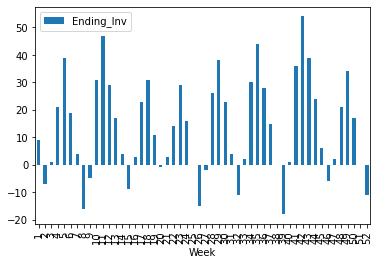

In [ ]:
### start your code here ###

inv_pol1[["Ending_Inv"]].plot(kind='bar')   # plotting inv levels

df_inv_policies = df_inv.join(inv_pol1)     # joining dataframes
df_inv_policies.head()

### end your code here ###

### Exercise 5: Renaming and combining `DataFrame` objects
Use the function created in Exercise 3 to simulate alternative inventory policies. You should implement the three alternative policies indicated in the dictionary `alt_inv_policies` below. The keys of this dictionary are the names given to the policies. The values are lists of two elements, where the first element is $s$ and the second value is $S$. 

Rename the columns of the `DataFrame` resulting from implementing each alternative policy according to its corresponding name (for example, rename the columns of the `DataFrame` of `P2` as `'P2_Start_Inv'`, `'P2_Receipt'`, `'P2_Ending_Inv'`, and `'P2_Order'`. ). Then, join all these dataframes to your main object `df_inv_policies` created in the previous exercise. 

In [ ]:
alt_inv_policies = {'P2': [10, 25],
                    'P3': [12, 40],
                    'P4': [16, 35]}

### start your code here ###

for i in list(alt_inv_policies.keys()):
    new_pol = inv_policy(df_inv, init_inv, lead_time, alt_inv_policies[i][0], alt_inv_policies[i][1])
    new_pol.columns = [i+'-'+name for name in new_pol.columns]
    df_inv_policies = df_inv_policies.join(new_pol)

df_inv_policies.head()
### end your code here ###

,Dem_Scen,Start_Inv,Receipt,Ending_Inv,Order,P2-Start_Inv,P2-Receipt,P2-Ending_Inv,P2-Order,P3-Start_Inv,P3-Receipt,P3-Ending_Inv,P3-Order,P4-Start_Inv,P4-Receipt,P4-Ending_Inv,P4-Order
Week,,,,,,,,,,,,,,,,,
1,18,27,0,9,21,27,0,9,16,27,0,9,31,27,0,9,26
2,16,9,0,-7,37,9,0,-7,32,9,0,-7,47,9,0,-7,42
3,13,-7,21,1,29,-7,16,-4,29,-7,31,11,29,-7,26,6,29
4,17,1,37,21,0,-4,32,11,0,11,47,41,0,6,42,31,0
5,11,21,29,39,0,11,29,29,0,41,29,59,0,31,29,49,0


Create one bar graph to visualize the inventory level of `P2`and `P3` at the end of each week over the planning horizon. What can you conclude about these two policies based on this data visualization?

<AxesSubplot:xlabel='Week'>

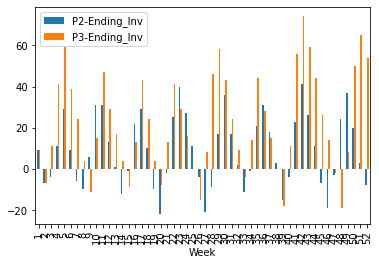

In [ ]:
### start your code here ###
df_inv_policies[['P2-Ending_Inv','P3-Ending_Inv']].plot(kind='bar')
### end your code here ###